# Final Project - Energy consumption

## Table of Contents

1. **Introduction**
   - Overview of the Project
   - Dataset Description

2. **Data Exploration (EDA)**
   - Descriptive analysis of variables
   - Detection of missing values and outliers
   - Visualization of time trends and correlations
   - Analysis of relationships between variables

3. **Data Preprocessing**
   - Train test split
   - Transformation of Temporal Variables (Extraction of Hour, Day, Month)

4. **Pipeline Creation with ColumnTransformer**
   - Encoding of Categorical Variables (`OneHotEncoder`) & Standardization/Normalization of Numerical Variables (`StandardScaler`) & Pipeline for Preprocessing (Categorical Encoding, Temporal Transformation, Standardization)
   - Feature Engineering with Common Sense Transformations

6. **Modeling & Evaluation**
   - Modeling and RMSE and MAPE Calculations
   - Comparison with HistGradientBoosting

7. **Cross-Validation**
   - Performing Cross-Validation on Each Model
   - Parameters optimisation with GridSearchCV
   - Comparison of Cross-Validated RMSE Scores

8. **Conclusion**
    - Final Insights on Model Performance
    - Recommendations for Future Improvements


## Overview of the project

We are XX, a company specializing in energy renovation in France. As part of a commercial approach, we have trained models on a dataset referencing various variables to predict energy consumption in an apartment as accurately as possible. This will enable the sales teams to support their sales pitch by comparing energy consumption before and after renovation. 

To achieve this, we will use the following variables:
- Timestamp: Date of measurement
- Temperature: Temperature in the apartment
- Humidity: Humidity in the apartment
- SquareFootage: Square meters of the apartment
- Occupancy: Number of occupants
- HVACUsage: Presence or absence of air conditioning
- LightingUsage: Lighting usage on the day of measurement
- RenewableEnergy: Use or non-use of renewable energy
- DayOfWeek: Day of the week
- Holiday: During holidays or not
- EnergyConsumption: Energy consumption

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('./Energy_consumption.csv')
df_copy = df
df_copy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


**Dataset Description**


In [58]:
df_copy.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


## 2. **Basic Data Overview**

**Detection of missing values and outliers**

In [59]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

There is no missing value

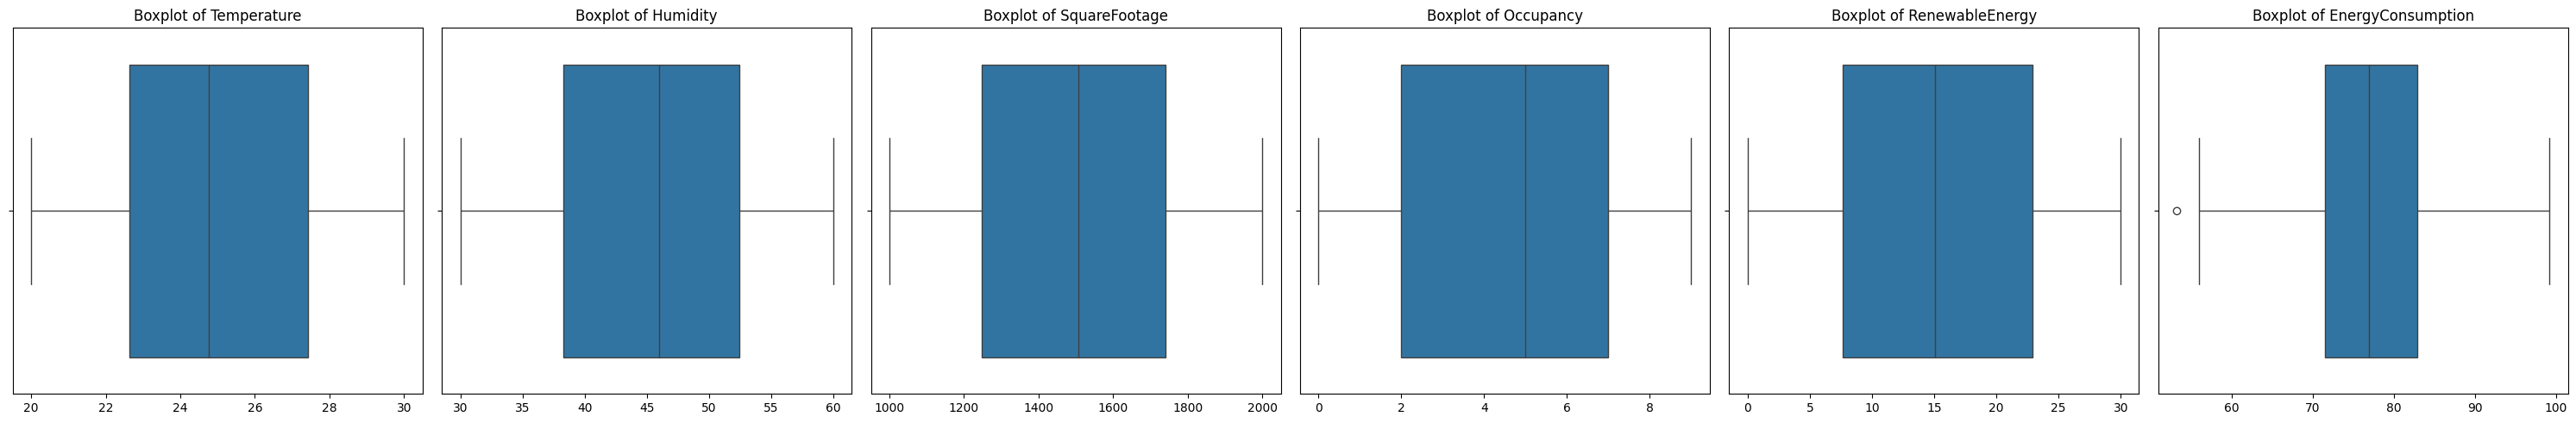

In [60]:
# Define the number of plots (based on the number of numerical columns)
numerical_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_columns)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5))

# Plot each boxplot on a separate axis
for i, column in enumerate(numerical_columns):
    sns.boxplot(ax=axes[i], x=df_copy[column])
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


**Visualization of time trends and correlations**

            Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0 2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1 2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2 2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3 2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4 2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  
4          70.811732  


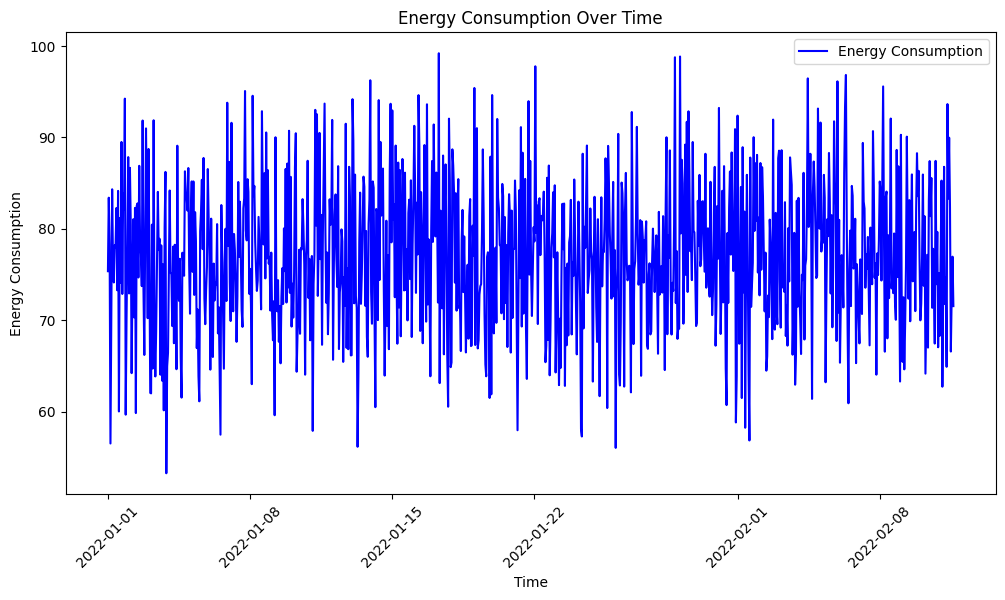

In [61]:

# We make sure that Timestamp is a date
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
print(df_copy.head())

plt.figure(figsize=(12, 6))
plt.plot(df_copy['Timestamp'], df_copy['EnergyConsumption'], label='Energy Consumption', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Saisonnality**

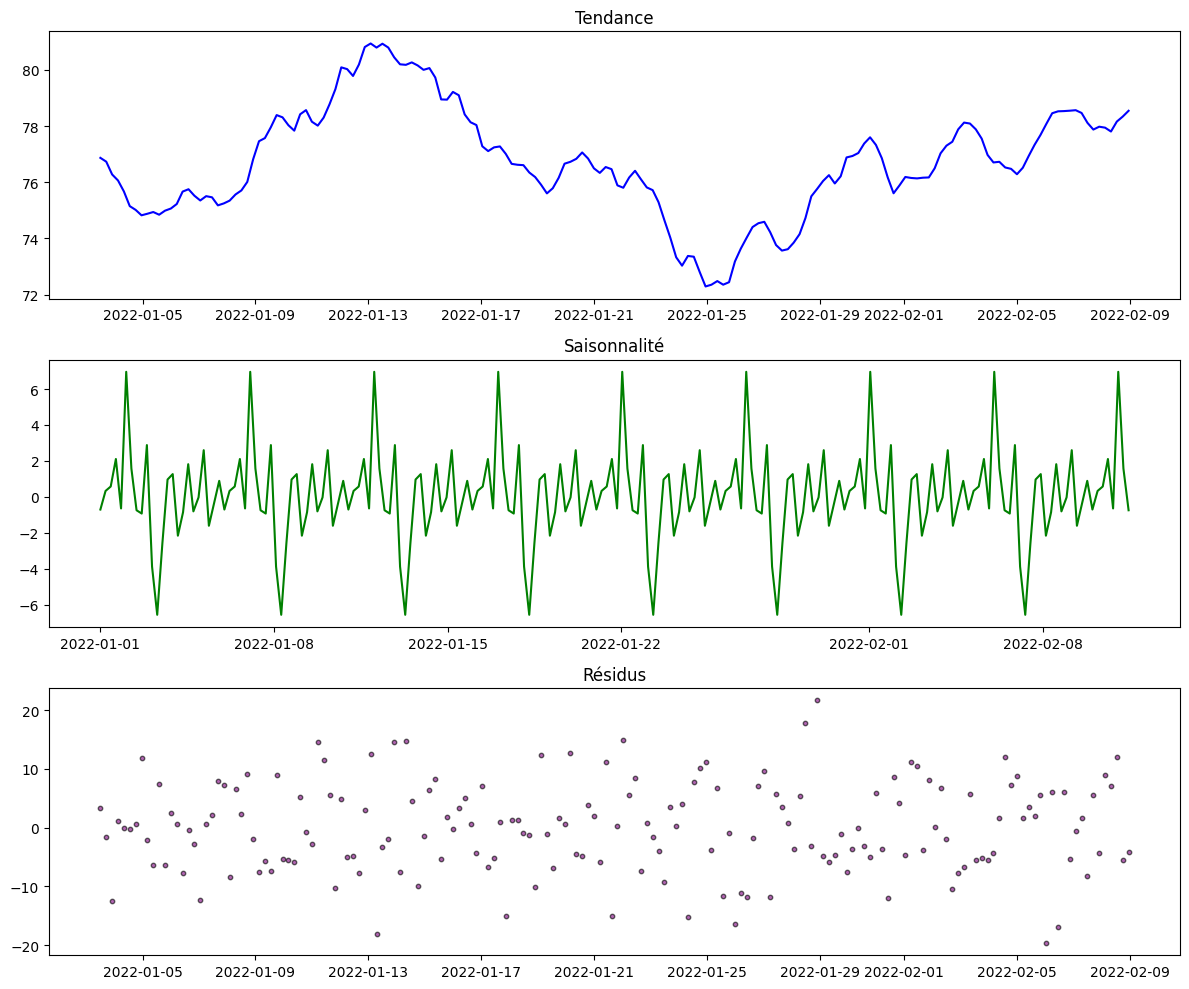

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df_copy.set_index('Timestamp', inplace=True)

# We take one observation every 5 hours
sampled_data = df_copy.iloc[::5, :]

# We decompose the energy consumption time series
decomposition = seasonal_decompose(sampled_data['EnergyConsumption'], model='additive', period=24)  # 24-hour period for daily seasonality

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Trend
axes[0].plot(sampled_data.index, trend, label='Trend', color='blue')
axes[0].set_title('Trend')

# Seasonality
axes[1].plot(sampled_data.index, seasonal, label='Seasonality', color='green')
axes[1].set_title('Seasonality')

# Residuals
axes[2].scatter(sampled_data.index, resid, label='Residuals', color='purple', edgecolor='k', alpha=0.6, s=10)  # Adjust 's' for point size
axes[2].set_title('Residuals')

plt.tight_layout()
plt.show()


**Analysis of relationships between variables**

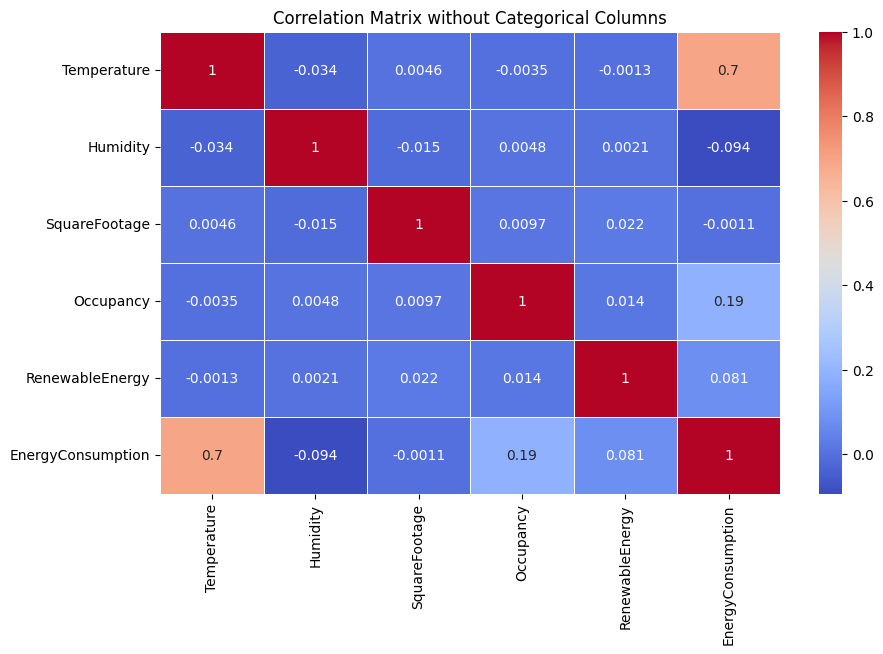

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df_copy.drop(columns=['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'])

corr_matrix = filtered_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix without Categorical Columns')
plt.show()


----------
## **DATA PROCESSING**

In [64]:
df_copy = pd.read_csv('./Energy_consumption.csv')
df_copy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [65]:
# Transformation of temporel variables
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
df_copy['Hour'] = df_copy['Timestamp'].dt.hour
df_copy['Day'] = df_copy['Timestamp'].dt.day
df_copy['Month'] = df_copy['Timestamp'].dt.month
df_copy['Year'] = df_copy['Timestamp'].dt.year
df_copy = df_copy.drop(columns=['Timestamp'])  # Supprimer Timestamp après extraction

df_copy.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month,Year
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,0,1,1,2022
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,1,2022
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2,1,1,2022
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,3,1,1,2022
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,4,1,1,2022


**Train and test split**

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_copy.drop(columns=['EnergyConsumption']),
    df_copy['EnergyConsumption'],
    test_size=0.2,
    random_state=42
)

In [67]:
print(X_train.head())
print(y_test.head())

     Temperature   Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
29     23.220630  46.073879    1649.510353          2       Off            On   
535    22.039777  33.460865    1991.131663          7       Off           Off   
695    26.118116  43.022562    1576.980679          2       Off           Off   
557    23.526242  44.682245    1139.804809          6        On            On   
836    26.718431  32.282471    1735.317885          5       Off            On   

     RenewableEnergy DayOfWeek Holiday  Hour  Day  Month  Year  
29         18.270528   Tuesday      No     5    2      1  2022  
535         4.570970    Friday     Yes     7   23      1  2022  
695         5.335458    Monday      No    23   29      1  2022  
557         7.639176    Monday      No     5   24      1  2022  
836        22.309696  Saturday     Yes    20    4      2  2022  
521    86.920611
737    88.351606
740    79.431363
660    90.009188
411    83.891100
Name: EnergyConsumption, dtype: float6

------------
## **Pipeline**

**Encoding of Categorical Variables with OneHotEncoder & Standardization/Normalization of Numerical Variables (`StandardScaler`)**

In [68]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Select categorical and numerical columns
CATEGORICAL_FEATURES = [
    'HVACUsage', 
    'LightingUsage', 
    'DayOfWeek', 
    'Holiday'
]

NUMERICAL_FEATURES = [
    'Temperature',
    'Humidity',
    'SquareFootage',
    'Occupancy',
    'RenewableEnergy',
    'Hour',
    'Day',
    'Month', 
    'Year'
]

# Convert types for categorical columns
def build_type_casting_transformer() -> ColumnTransformer:
    return ColumnTransformer(
        transformers=[
            (
                "cast_category",
                FunctionTransformer(lambda x: x.astype("category")),
                CATEGORICAL_FEATURES,
            ),
        ],
        remainder="passthrough",
        verbose_feature_names_out=False,
    )

# Handle encoding of categorical variables and scaling of numerical variables
def build_preprocessor() -> ColumnTransformer:
    return ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), NUMERICAL_FEATURES),  # Standardize the numerical columns
            ('cat', OneHotEncoder(drop='first', sparse_output=False), CATEGORICAL_FEATURES)  # Encode the categorical columns with dense output
        ],
        remainder='passthrough',  # Keep other columns as they are
        verbose_feature_names_out=False
    )

preprocessing_pipeline = Pipeline(
    [
        ("type_casting", build_type_casting_transformer()),  # Step for casting categories
        ("preprocessor", build_preprocessor()),  # Preprocessing step (encoding + standardization)
    ]
)

preprocessing_pipeline.set_output(transform="pandas")

preprocessed_X_train = preprocessing_pipeline.fit_transform(X_train)

print(preprocessed_X_train.head())


     Temperature  Humidity  SquareFootage  Occupancy  RenewableEnergy  \
29     -0.600071  0.117232       0.510639  -0.930968         0.334790   
535    -1.014074 -1.368855       1.711243   0.818150        -1.234490   
695     0.415776 -0.242279       0.255739  -0.930968        -1.146918   
557    -0.492925 -0.046732      -1.280685   0.468326        -0.883028   
836     0.626245 -1.507695       0.812203   0.118503         0.797475   

         Hour       Day     Month  Year  HVACUsage_On  LightingUsage_On  \
29  -0.934995 -1.245629 -0.588898   0.0           0.0               1.0   
535 -0.643662  1.075934 -0.588898   0.0           0.0               0.0   
695  1.686996  1.739237 -0.588898   0.0           0.0               0.0   
557 -0.934995  1.186484 -0.588898   0.0           1.0               1.0   
836  1.249998 -1.024528  1.698086   0.0           0.0               1.0   

     DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
29                0.0                 0.0      

c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


**Feature Engineering with Common Sense Transformations**


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from typing import Dict
import numpy as np
import pandas as pd

# We compute metrics with the pipeline
def run_pipeline_and_compute_metrics(
    pipeline: Pipeline,
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    y_train: pd.Series,
    y_test: pd.Series,
) -> dict:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return {
        "RMSE": round(float(np.sqrt(mean_squared_error(y_test, y_pred))), 2),
        "MAPE": round(float(mean_absolute_percentage_error(y_test, y_pred)), 2),
    }

# Return the average RMSE
def run_cross_val_pipeline(
    pipeline: Pipeline,
    X_train: pd.DataFrame,
    y_train: pd.Series,
    cv: int = 5
) -> dict:
    cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
    return {
        "Cross-validated RMSE": round(-np.mean(cross_val_scores), 2)
    }

# Fix data leakage: remove 'EnergyConsumption' after transformations
# Before: The function created the new features in the pipeline
def build_common_sense_transformer() -> ColumnTransformer:
    return ColumnTransformer(
        transformers=[
            (
                "compute_energy_per_sqft",
                FunctionTransformer(
                    lambda df: (df["EnergyConsumption"] / df["SquareFootage"]).to_frame(
                        name="Energy_per_sqft"
                    )
                ),
                ["EnergyConsumption", "SquareFootage"],
            ),
            (
                "compute_energy_per_occupant",
                FunctionTransformer(
                    lambda df: (df["EnergyConsumption"] / df["Occupancy"]).to_frame(
                        name="Energy_per_occupant"
                    )
                ),
                ["EnergyConsumption", "Occupancy"],
            ),
            ("drop_target", "drop", ["EnergyConsumption"]),  # Remove EnergyConsumption
            ("passthrough", "passthrough", ["SquareFootage", "Occupancy"]),
        ],
        verbose_feature_names_out=False,
        remainder="passthrough",
    )


# Temporarily reintegrate 'EnergyConsumption' 
X_train = X_train.copy()
X_train['EnergyConsumption'] = y_train

X_test = X_test.copy()
X_test['EnergyConsumption'] = y_test


----------
## **Modeling & evaluation**

**Modeling and RMSE and MAPE Calculations**

In [70]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Common Sense Feature Engineering
common_steps = [
    ("preprocessor", preprocessing_pipeline),  # Preprocessing pipeline
    ("common_sense_feature_engineering", build_common_sense_transformer()),  # Feature Engineering
]

# We cill compare metrics for each model
metrics_comparison = {}

for model_name, model in models.items():
    # We create a pipeline for each model
    steps = common_steps + [("model", model)]
    pipeline = Pipeline(steps)
    pipeline.set_output(transform="pandas")
    
    # We calculate the metrics for each model
    metrics = run_pipeline_and_compute_metrics(
        pipeline, X_train, X_test, y_train, y_test
    )
    metrics_comparison[model_name] = metrics

# Then we display the results for each model
metrics_df = pd.DataFrame(metrics_comparison)
metrics_df = metrics_df.T  # Transpose to have the models as columns
print(metrics_df)


c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(
c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


                   RMSE  MAPE
Linear Regression  5.16  0.05
Random Forest      5.19  0.05
XGBoost            4.32  0.05


c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


**Comparison with HistGradientBoosting**

In [71]:
# Pipeline with HistGradientBoosting for comparison
from sklearn.ensemble import HistGradientBoostingRegressor

STEPS_WITH_FEATURE_ENGINEERING = [
    ("preprocessor", preprocessing_pipeline),  # Preprocessing pipeline (existing)
    ("common_sense_feature_engineering", build_common_sense_transformer()),  # Adding logical transformations
    ("model", HistGradientBoostingRegressor()),  # Model without the 'categorical_features' parameter
]

# Initializing the pipeline with HistGradientBoosting
pipeline_with_feature_engineering = Pipeline(STEPS_WITH_FEATURE_ENGINEERING)
pipeline_with_feature_engineering.set_output(transform="pandas")

# Calculing the metrics for HistGradientBoosting with Common Sense Features
hgb_metrics = run_pipeline_and_compute_metrics(
    pipeline_with_feature_engineering, X_train, X_test, y_train, y_test
)

# Comparing with other models
metrics_comparison_df = pd.DataFrame(metrics_comparison)
metrics_comparison_df["HistGradientBoosting"] = hgb_metrics
metrics_comparison_df = metrics_comparison_df.T  # Transpose to have the models as columns


print(metrics_comparison_df)


c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(



Comparison of Linear Regression, Random Forest, XGBoost vs HistGradientBoosting:
                      RMSE  MAPE
Linear Regression     5.16  0.05
Random Forest         5.19  0.05
XGBoost               4.32  0.05
HistGradientBoosting  4.06  0.04


----------
## **Cross-Validation**

**Performing Cross-Validation on Each Model**

In [72]:
# Store cross-validation results
cross_val_metrics = {}

for model_name, model in models.items():
    steps = common_steps + [("model", model)]
    pipeline = Pipeline(steps)
    pipeline.set_output(transform="pandas")
    
    # RMSE in cross-validation 
    cross_val_result = run_cross_val_pipeline(
        pipeline, X_train, y_train
    )
    
    # Add the results to the comparison
    cross_val_metrics[model_name] = cross_val_result

# Cross-validation for HistGradientBoosting
hgb_cross_val = run_cross_val_pipeline(
    pipeline_with_feature_engineering, X_train, y_train
)

# Add HistGradientBoosting 
cross_val_metrics["HistGradientBoosting"] = hgb_cross_val

# Display the cross-validation results for all models
cross_val_df = pd.DataFrame(cross_val_metrics).T  
print(cross_val_df)


c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(
c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(
c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(



Cross-validated RMSE for Linear Regression, Random Forest, XGBoost, and HistGradientBoosting:
                      Cross-validated RMSE
Linear Regression                     5.11
Random Forest                         5.18
XGBoost                               4.66
HistGradientBoosting                  4.42


**Parameters optimisation with GridSearchCV and saving to MLflow**

In [73]:
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
import os

# MLflow tracking URI
mlflow.set_tracking_uri('http://127.0.0.1:5000')

# Set the project in MLflow
mlflow.set_experiment("Energy Consumption Forecasting")

# GridSearchCV with MLflow
def run_grid_search_with_mlflow(model_name, pipeline, param_grid, X_train, y_train):
    with mlflow.start_run(run_name=model_name):
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            scoring='neg_root_mean_squared_error',
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        
        # Get the best hyperparameters and score
        best_score = -grid_search.best_score_
        best_params = grid_search.best_params_
        
        # Log hyperparameters and the best score in MLflow
        mlflow.log_params(best_params)
        mlflow.log_metric("Best RMSE", best_score)
        
        # Save the model in MLflow
        mlflow.sklearn.log_model(grid_search.best_estimator_, model_name)
        
        # Display the artifact URI to verify
        print(f"Model {model_name} saved in: {mlflow.get_artifact_uri()}")
    
    return grid_search

# Parameters to test for each model
param_grids = {
    "Random Forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
    },
    "XGBoost": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.01, 0.1],
        "model__max_depth": [3, 6, 9],
    },
    "HistGradientBoosting": {
        "model__learning_rate": [0.01, 0.1],
        "model__max_iter": [100, 200],
        "model__max_depth": [None, 10, 20],
    },
}

# Apply GridSearchCV with MLflow for each model (except Linear Regression)
grid_search_results = {}

for model_name, model in models.items():
    if model_name != "Linear Regression": 
        steps = common_steps + [("model", model)]
        pipeline = Pipeline(steps)
        pipeline.set_output(transform="pandas")
        
        grid_search = run_grid_search_with_mlflow(model_name, pipeline, param_grids[model_name], X_train, y_train)
        
        grid_search_results[model_name] = {
            "Best Score (RMSE)": -grid_search.best_score_,
            "Best Parameters": grid_search.best_params_
        }

# GridSearchCV for HistGradientBoosting
steps = [
    ("preprocessor", preprocessing_pipeline),  # Preprocessing pipeline
    ("common_sense_feature_engineering", build_common_sense_transformer()),  # Feature Engineering
    ("model", HistGradientBoostingRegressor()),  # HistGradientBoosting model
]
pipeline_with_feature_engineering = Pipeline(steps)
pipeline_with_feature_engineering.set_output(transform="pandas")

# GridSearch with MLflow for HistGradientBoosting
grid_search_hgb = run_grid_search_with_mlflow("HistGradientBoosting", pipeline_with_feature_engineering, param_grids["HistGradientBoosting"], X_train, y_train)

# We store the results for HistGradientBoosting
grid_search_results["HistGradientBoosting"] = {
    "Best Score (RMSE)": -grid_search_hgb.best_score_,
    "Best Parameters": grid_search_hgb.best_params_
}

grid_search_results_df = pd.DataFrame(grid_search_results).T  
print(grid_search_results_df)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(
2024/10/24 14:44:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/24 14:44:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/865396981365610378/runs/19cab88890d144a9bcca384326d1d9cc.
2024/10/24 14:44:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/865396981365610378.
c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  

Model Random Forest saved in: mlflow-artifacts:/865396981365610378/19cab88890d144a9bcca384326d1d9cc/artifacts
Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024/10/24 14:44:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/24 14:44:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/865396981365610378/runs/707884e440e4421d84c4ad03aad05bc6.
2024/10/24 14:44:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/865396981365610378.
c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


Model XGBoost saved in: mlflow-artifacts:/865396981365610378/707884e440e4421d84c4ad03aad05bc6/artifacts
Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024/10/24 14:45:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/24 14:45:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run HistGradientBoosting at: http://127.0.0.1:5000/#/experiments/865396981365610378/runs/865641200c9846a484f2c494861f5ced.
2024/10/24 14:45:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/865396981365610378.


Model HistGradientBoosting saved in: mlflow-artifacts:/865396981365610378/865641200c9846a484f2c494861f5ced/artifacts

GridSearchCV Results for Random Forest, XGBoost, and HistGradientBoosting:
                     Best Score (RMSE)  \
Random Forest                 5.169499   
XGBoost                       4.233853   
HistGradientBoosting          4.343748   

                                                        Best Parameters  
Random Forest         {'model__max_depth': 10, 'model__min_samples_s...  
XGBoost               {'model__learning_rate': 0.1, 'model__max_dept...  
HistGradientBoosting  {'model__learning_rate': 0.1, 'model__max_dept...  


In [74]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline

# Start a new MLflow experiment
mlflow.set_experiment("Energy Consumption Forecasting")

def log_mlflow_model(model_name, pipeline, X_train, X_test, y_train, y_test, best_params):
    """Function to log a model with MLflow."""
    with mlflow.start_run(run_name=model_name):
        # Train model
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        # Log metrics
        mlflow.log_metric("RMSE", round(rmse, 2))
        mlflow.log_metric("MAPE", round(mape, 2))
        
        # Log hyperparameters 
        mlflow.log_params(best_params)
        
        # Save the model
        mlflow.sklearn.log_model(pipeline, model_name)

        print(f"Model {model_name} logged in MLflow with RMSE: {round(rmse, 2)}, MAPE: {round(mape, 2)}")

# Apply MLflow after the GridSearchCV for each model
for model_name, model in models.items():
    if model_name != "Linear Regression": 
        steps = common_steps + [("model", model)]
        pipeline = Pipeline(steps)
        pipeline.set_output(transform="pandas")
        
        # Use the best parameters obtained from GridSearch
        best_params = grid_search_results[model_name]["Best Parameters"]
        
        # Log the model in MLflow
        log_mlflow_model(model_name, pipeline, X_train, X_test, y_train, y_test, best_params)

# Apply MLflow for HistGradientBoosting
best_params_hgb = grid_search_results["HistGradientBoosting"]["Best Parameters"]
log_mlflow_model("HistGradientBoosting", pipeline_with_feature_engineering, X_train, X_test, y_train, y_test, best_params_hgb)


c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(
2024/10/24 14:45:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/24 14:45:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/865396981365610378/runs/67d5a7b8a801490e88b48ba95d1bfd49.
2024/10/24 14:45:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/865396981365610378.
c:\Users\Yanna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  

Model Random Forest logged in MLflow with RMSE: 5.19, MAPE: 0.05


2024/10/24 14:45:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/24 14:45:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/865396981365610378/runs/bb4d78409fca4f4680d4c8c497fc6474.
2024/10/24 14:45:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/865396981365610378.


Model XGBoost logged in MLflow with RMSE: 4.32, MAPE: 0.05


2024/10/24 14:45:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/24 14:45:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run HistGradientBoosting at: http://127.0.0.1:5000/#/experiments/865396981365610378/runs/4b4474e9eb104886a137c674d07b1abe.
2024/10/24 14:45:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/865396981365610378.


Model HistGradientBoosting logged in MLflow with RMSE: 4.06, MAPE: 0.04


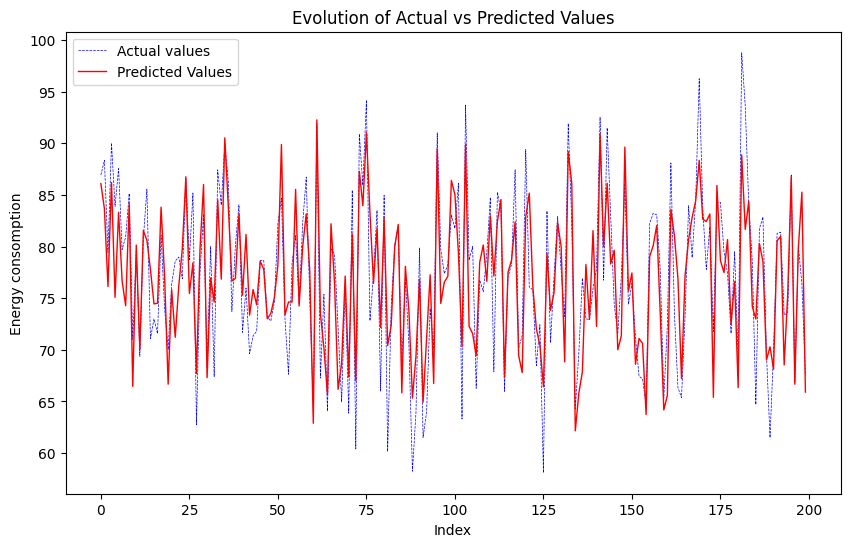

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Obtenir les prédictions sur le jeu de test
y_pred = pipeline.predict(X_test)


# 2. Line plot : Si vous voulez visualiser la tendance temporelle
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual values", color="blue", linestyle="--", linewidth=0.5)
plt.plot(range(len(y_test)), y_pred, label="Predicted Values", color="red", linestyle="-",linewidth=1)
plt.xlabel('Index')
plt.ylabel('Energy consomption')
plt.title('Evolution of Actual vs Predicted Values')
plt.legend()
plt.show()
